In [1]:
# Librería para instalar y leer archivos rds
#! pip install pyreadr

In [57]:
import pandas as pd
import numpy as np
import pyreadr

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

plt.rcParams["figure.figsize"] = (10,8)


In [3]:
df = pd.read_csv("Datos/bikes.csv", index_col = 0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [40]:
df.duplicated().sum()

0

In [7]:
df_categoricas = df[["dteday", "season", "holiday", "workingday", "weekday", "mnth", "weathersit"]]
df_categoricas

,dteday,season,holiday,workingday,weekday,mnth,weathersit
0,01-01-2018,spring,0,0,6,1,2
1,02-01-2018,spring,0,0,0,1,2
2,03-01-2018,spring,0,1,1,1,1
3,04-01-2018,spring,0,1,2,1,1
4,05-01-2018,spring,0,1,3,1,1
...,...,...,...,...,...,...,...
725,27-12-2019,spring,0,1,4,12,2
726,28-12-2019,spring,0,1,5,12,2
727,29-12-2019,spring,0,0,6,12,2
728,30-12-2019,spring,0,0,0,12,1


In [33]:
df = df.astype({ 'yr':'category',"holiday":'category',"workingday":'category', "weekday":'category', "mnth":'category', "weathersit":'category'})

In [34]:
df.dtypes

instant          int64
dteday          object
season          object
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [35]:
# vamos a renombrar nuestras columnas
df.rename(columns={'yr':'year', 'mnth':'month', 'atemp':'sensacion_termica', 'cnt':'count_bikes'}, inplace=True)

In [36]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'sensacion_termica', 'hum',
       'windspeed', 'casual', 'registered', 'count_bikes'],
      dtype='object')

In [8]:
#Chicas guardadlo en un jupyter es oro!(1)
dicc = {'variable':[], 'valores_unicos':[], 'frecuencias':[]} 

for col in df_categoricas.columns: 
    dicc['variable'].append(col) 
    dicc['valores_unicos'].append(list(df_categoricas[col].value_counts().index)) 
    dicc['frecuencias'].append(list(df_categoricas[col].value_counts().values)) 

In [9]:
#Chicas guardadlo en un jupyter es oro!(2)
df_uniques = pd.DataFrame(dicc) 
df_uniques 

,variable,valores_unicos,frecuencias
0,dteday,"[01-01-2018, 25-04-2019, 27-04-2019, 28-04-201...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,season,"[autumn, summer, spring, winter]","[188, 184, 180, 178]"
2,holiday,"[0, 1]","[709, 21]"
3,workingday,"[1, 0]","[499, 231]"
4,weekday,"[6, 0, 1, 2, 4, 5, 3]","[105, 105, 105, 104, 104, 104, 103]"
5,mnth,"[1, 3, 5, 7, 8, 10, 12, 4, 6, 9, 11, 2]","[62, 62, 62, 62, 62, 62, 62, 60, 60, 60, 60, 56]"
6,weathersit,"[1, 2, 3]","[463, 246, 21]"


##### Las ideas de análisis que tenemos hasta ahora son:
* Anticipar a las bicis que pueden hacer falta según condiciones climáticas, festivos u otros eventos (aún por recopilar)
* Mirar datos sobre atascos, para recomendar el uso de bicis en según qué zonas
* Geolocalizar estos atascos para ver de dónde provienen y hacer un recomendador de estaciones de bicicleta

In [28]:
# Nos vamos a centrar en analizar el df original para establecer cuales variables afectana nuetra canitdad ed bicicletas

In [38]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188
year,730,2,0,365
month,730,12,1,62
holiday,730,2,0,709
weekday,730,7,0,105
workingday,730,2,1,499
weathersit,730,3,1,463


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
sensacion_termica,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
count_bikes,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


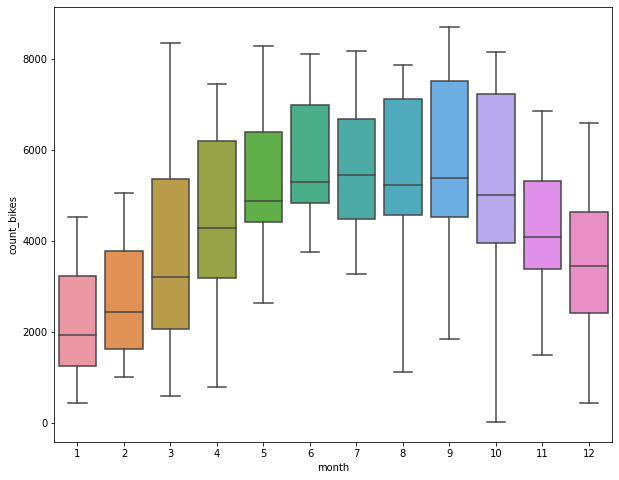

In [45]:
# vemos que hay variacion entre meses y por lo tanto habra variacion entre estaciones, tenemos que limpiar la columna
sns.boxplot(x='month', y='count_bikes', data=df);

In [ ]:
# limpieza de la coolumna season
for k, v in ind2.items():
    mediana = df_menores[k].median()
    for i in v:
        df_menores.loc[i,k] = mediana

In [49]:
df['season'].unique()

array(['spring', 'summer', 'autumn', 'winter'], dtype=object)

In [48]:
df[df['season']== 'spring']['month'].unique()

[1, 2, 3, 12]
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [50]:
df[df['season']== 'summer']['month'].unique()

[3, 4, 5, 6]
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [51]:
df[df['season']== 'autumn']['month'].unique()

[6, 7, 8, 9]
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [52]:
df[df['season']== 'winter']['month'].unique()

[9, 10, 11, 12]
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [53]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'sensacion_termica', 'hum',
       'windspeed', 'casual', 'registered', 'count_bikes'],
      dtype='object')

In [61]:
df['dteday'] = df['dteday'].astype('datetime64[ns]')

In [62]:
df['dteday'].head()

0   2018-01-01
1   2018-02-01
2   2018-03-01
3   2018-04-01
4   2018-05-01
Name: dteday, dtype: datetime64[ns]

In [ ]:
#codigo copiado de Ani
df = pd.DataFrame({'date': pd.date_range('2000-01-01', '2001-01-01', periods=12)})
seasons = {(1, 12, 2): 'winter', (3, 4, 5): 'spring', (6, 7, 8): 'summer', (9, 10, 11): 'autumn'}
df['m'] = df.date.dt.month

def season(ser):
    for k in seasons.keys():
        if ser in k:
            return seasons[k]

df['s'] = df.m.apply(seasons)


In [63]:
# prueba, por si sirve el razonamiento
# def limpiar_season(x):
    if 2018-12-21 <= df['dteday'] <= 2018-3-20 or 2019-12-21 <= df['dteday'] <= 2019-3-20:
        x = 'winter'
    elif 2018-3-21 <= df['dteday'] <= 2018-6-20 or 2019-3-21 <= df['dteday'] <= 2019-6-20:
        x = 'spring'
    elif 2018-6-21 <= df['dteday'] <= 2018-9-20 or 2019-6-21 <= df['dteday'] <= 2019-9-20:
        x = 'summer'
    elif 2018-9-21 <= df['dteday'] <= 2018-12-20 or 2019-9-21 <= df['dteday'] <= 2019-12-20:
        x = 'fall'
    else:
        x= np.nan

In [66]:
datetime(2020, 5, 17)

datetime.datetime(2020, 5, 17, 0, 0)

In [69]:
#estaba con esto por ultimo, no sé como comparar mayores y menores en fechas
def limpiar_season(x):
    if datetime(2018, 12, 21) <= df['dteday'] <= datetime(2018, 3, 20) or datetime(2019, 12, 21) <= df['dteday'] <= datetime(2019, 3, 20):
        x = 'winter'
    elif datetime(2018, 3, 21) <= df['dteday'] <= datetime(2018, 6, 20) or datetime(2019, 3, 21) <= df['dteday'] <= datetime(2019, 6, 20):
        x = 'spring'
    elif datetime(2018, 6, 21) <= df['dteday'] <= datetime(2018, 9, 20) or datetime(2019, 6, 21) <= df['dteday'] <= datetime(2019, 9, 20):
        x = 'summer'
    elif datetime(2018, 9, 21) <= df['dteday'] <= datetime(2018, 12, 20) or datetime(2019, 9, 21) <= df['dteday'] <= datetime(2019, 12, 20):
        x = 'fall'
    else:
        x= np.nan

In [70]:
df['season']= df['season'].apply(limpiar_season)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().